### Grouping algorithm ran on the GAMA III data for 0.002 < z < 0.65

In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from GalGroup import *

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
hdul = fits.open('gkvScienceCatv02.fits')
data = hdul[1].data
t=Table(data)
df = t.to_pandas()

In [3]:
df = add_column(df, column_file = 'SFMPhotoZv01.fits', column_name = 'zmax', common_column = 'uberID')
df.loc[df['NQ'] < 3, 'Z'] = df.loc[df['NQ'] < 3, 'zmax']
df.loc[df['NQ'] < 3, 'NQ'] = 10

In [4]:
df = df[(df['SC']>=7) & (df['NQ']>=3) & (df['Z']>0.002) & (df['Z']<0.65)]

In [5]:
df

,uberID,RAcen,Deccen,RAmax,Decmax,RAGAIA,DecGAIA,sky_mean,skyRMS_mean,log10seeing,...,flux_err_W2t,duplicate,mask,starmask,uberclass,CATAID,SC,Z,NQ,zmax
28,128980003711188,129.579930,-1.029780,129.579933,-1.029784,129.579917,-1.029802,-3.252273e-13,3.965989e-12,-0.251301,...,9.162291e-06,False,False,False,1,3600151,8,0.08185,4,0.12
39,128980004608892,129.579121,-1.246004,129.579142,-1.245971,129.579127,-1.245989,-6.235091e-13,4.453040e-12,-0.251301,...,6.123744e-07,False,False,False,1,3874273,7,0.30551,4,0.27
46,128980005210530,129.578549,-1.091716,129.578537,-1.091739,129.578521,-1.091757,-1.983639e-13,4.022541e-12,-0.251301,...,8.127045e-06,False,False,False,1,3600249,8,0.28994,4,0.30
48,128980005309861,129.578474,-1.154733,129.578459,-1.154730,129.578443,-1.154749,-1.950925e-13,4.120472e-12,-0.251301,...,2.108944e-06,False,False,False,1,3600327,7,0.27092,4,0.26
79,128980008210800,129.575720,-1.066314,129.575705,-1.066317,129.575689,-1.066335,-4.437626e-13,4.039319e-12,-0.251301,...,1.040680e-06,False,False,False,1,3600321,7,0.29026,4,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232834,350701210901957,350.152979,-30.597441,350.153048,-30.597472,350.153079,-30.597509,-3.552066e-13,4.013951e-12,-0.184533,...,8.948747e-07,False,False,False,1,5348972,7,0.24000,10,0.24
2232837,350701211105453,350.155003,-30.268311,350.154994,-30.268291,350.155026,-30.268328,-2.572462e-13,4.066720e-12,-0.184533,...,2.008118e-06,False,False,False,1,5350314,8,0.37250,4,0.36
2232845,350701212604914,350.153042,-30.319001,350.153025,-30.319035,350.153057,-30.319073,-4.109313e-13,4.059225e-12,-0.184533,...,1.659121e-06,False,False,False,1,5350126,8,0.08021,4,0.08
2232905,350701223301873,350.139455,-30.605329,350.139431,-30.605313,350.139462,-30.605350,-4.958975e-13,3.998534e-12,-0.184533,...,2.268022e-06,False,False,False,1,5348928,8,0.16611,4,0.19


('lambda', 'pass')
('lambda', 'pass')
('lambda', 'pass')
('lambda', 'pass')
('lambda', 'pass')
Fixed  0 missing fluxes
Replacing 58 bad fits with mean


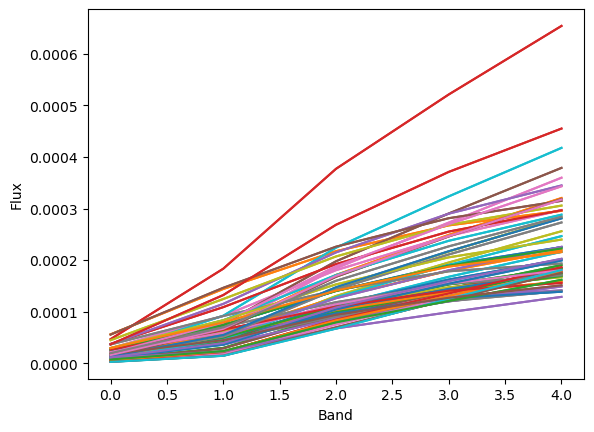

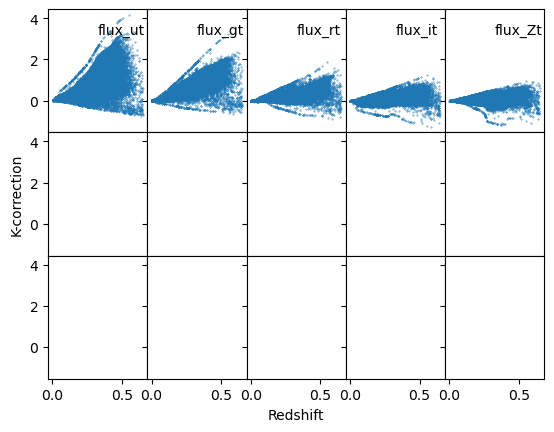

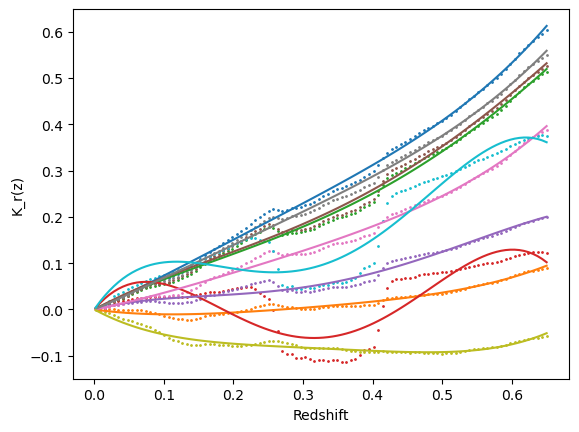

In [6]:
df = kcorrection(df, responses=['vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z'], fnames=['flux_ut', 'flux_gt', 'flux_rt', 'flux_it', 'flux_Zt'], ferrnames=['flux_err_ut', 'flux_err_gt', 'flux_err_rt', 'flux_err_it', 'flux_err_Zt'], redshift='Z')

In [7]:
df = luminosity_distance(df, redshift='Z')

In [8]:
df = magnitude(df, bands=['u', 'g', 'r', 'i', 'Z'], fluxbands = ['flux_ut', 'flux_gt', 'flux_rt', 'flux_it', 'flux_Zt'])

C:\Users\adrie\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\adrie\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\adrie\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\adrie\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
df = df[df['m_r']<19.65]

Constants used : H0 = 100 , Om0 = 0.25 , Ode0 = 0.75 , h = 1.0 km / (Mpc s) , alpha = -1.26 , M_star = -20.71 , phi_star = 0.009549925860214359 , b0 = 0.06 , R0 = 18 , Eb = -0.0 , Er = -0.02 , nu = 0.63 , delta = 9 , r_delta = 1500000.0 , l_delta = 12000000.0
Setting up the Group finder : 
Calculating rho_bar ...


0it [00:00, ?it/s]

Calculating rho_emp ...


  0%|          | 0/202979 [00:00<?, ?it/s]

  0%|          | 0/202979 [00:00<?, ?it/s]

Calculating R and b ...


  0%|          | 0/202979 [00:00<?, ?it/s]

Calculating D_lim ...


  0%|          | 0/202979 [00:00<?, ?it/s]

460 galaxies removed due to having D_lim > 10**8
Running the Group finder : 
Finding groups ...


  0%|          | 0/202519 [00:00<?, ?it/s]

Writing groups to a dataframe ...


  0%|          | 0/27411 [00:00<?, ?it/s]

  0%|          | 0/27411 [00:00<?, ?it/s]

Calculating group velocity dispersion ...


  0%|          | 0/27411 [00:00<?, ?it/s]

148 groups removed due to having Vel_Disp > 2500
Calculating group projected radius ...


  0%|          | 0/27263 [00:00<?, ?it/s]

Calculating group dynamical mass ...


  0%|          | 0/27263 [00:00<?, ?it/s]

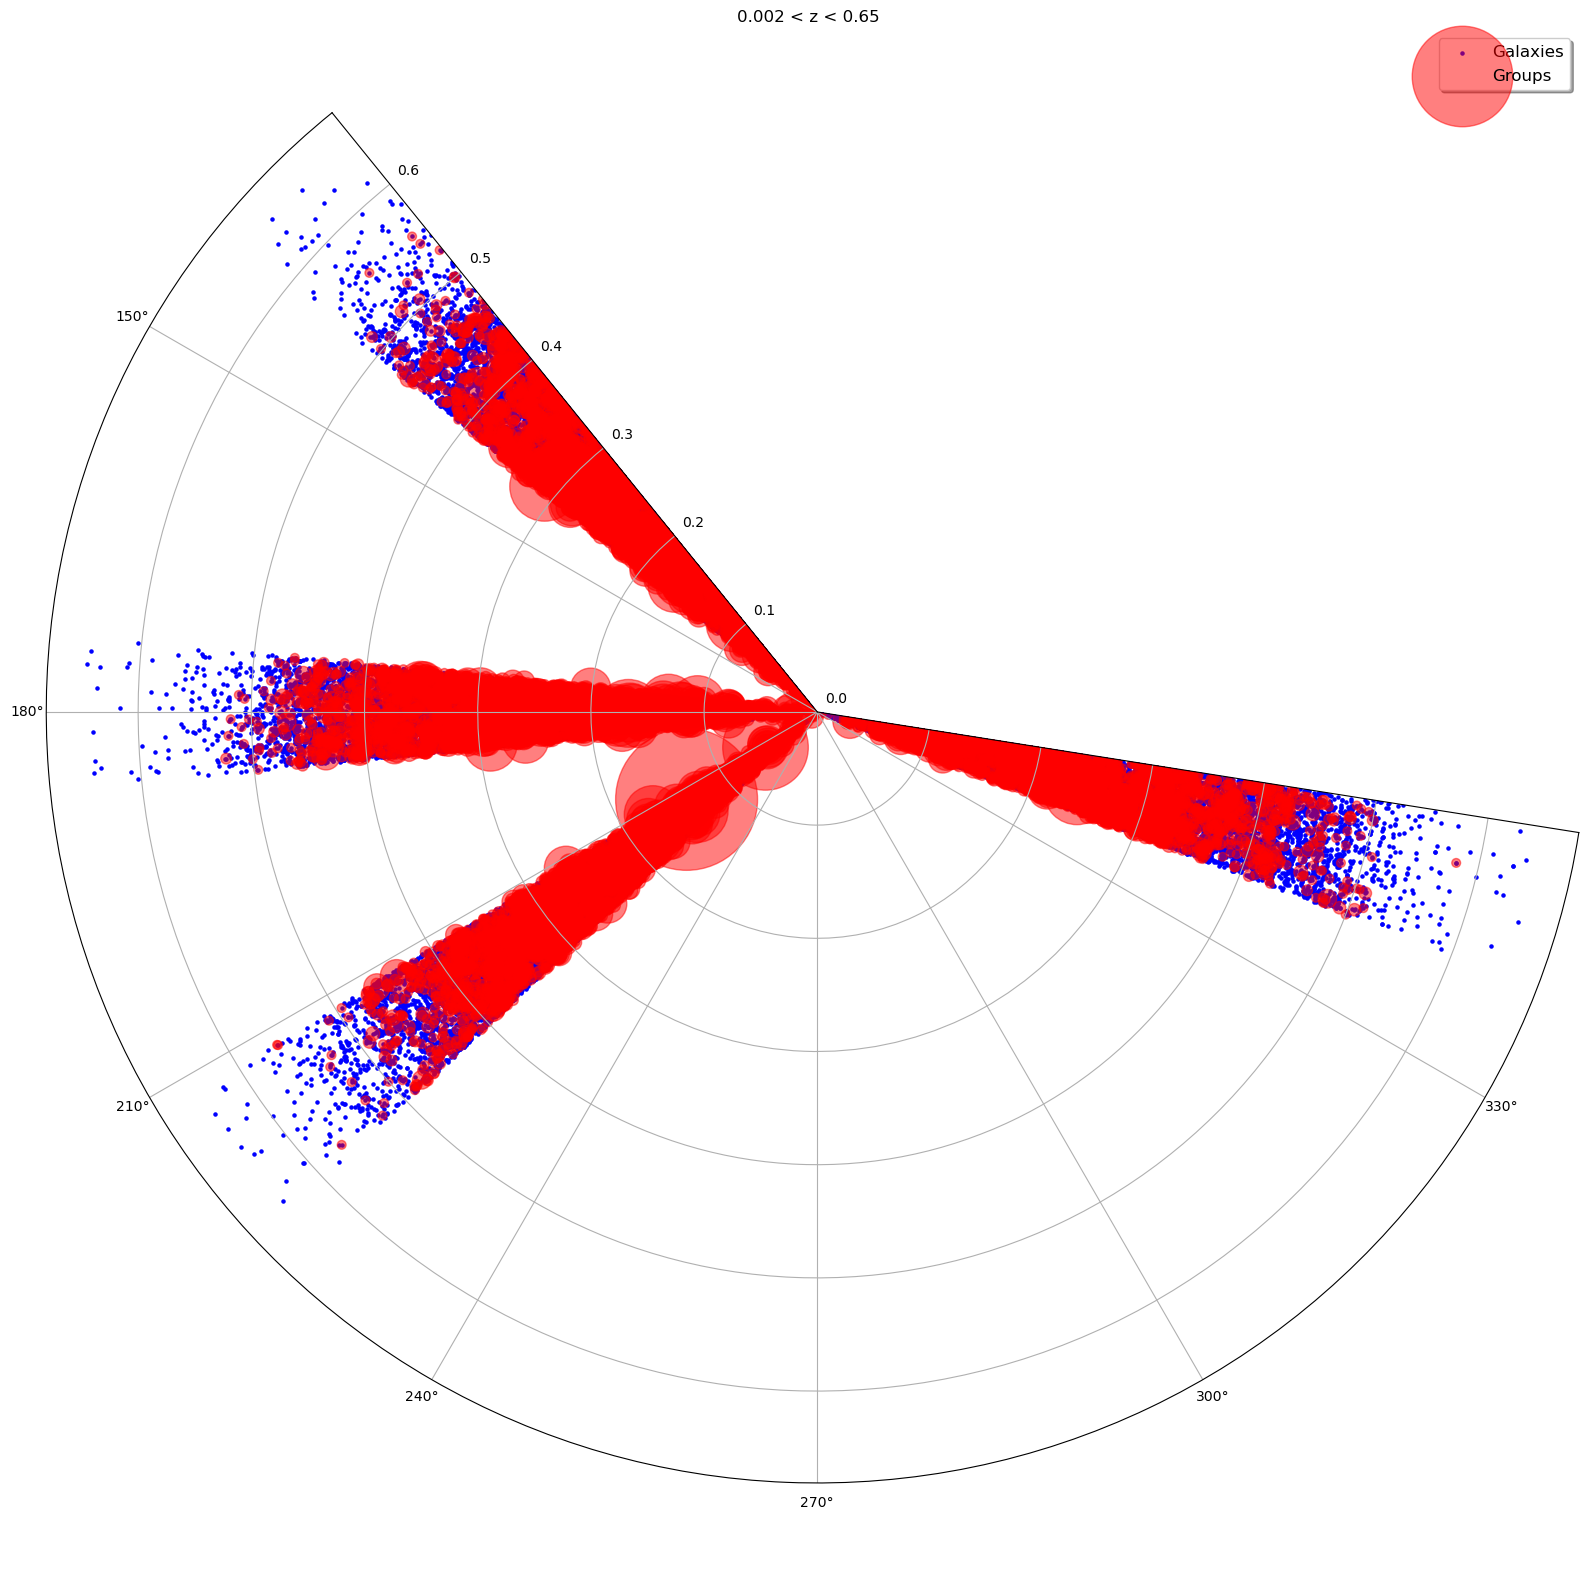

In [10]:
dfRec, df = main(dataframe = df, zmin=0.002, zmax=0.65, mag_col = 'm_r', Z_col = 'Z', Kcorr_col = 'r_Kcorrection', 
                 vel_err_col = None, RA_col = 'RAcen', Dec_col = 'Deccen', ID_col = 'uberID', H0=100, Om0=0.25, Ode0=0.75)

In [11]:
df

,uberID,RAcen,Deccen,RAmax,Decmax,RAGAIA,DecGAIA,sky_mean,skyRMS_mean,log10seeing,...,IndexLoc,Num_Den,rho_emp,b,R,D0,Ang_link,Los_link,RecID,v
0,128980003711188,129.579930,-1.029780,129.579933,-1.029784,129.579917,-1.029802,-3.252273e-13,3.965989e-12,-0.251301,...,0,23,0.271153,0.06,16.652591,3.726657e+06,0.000926,3.723510e+06,0,24538012.0
1,128980004608892,129.579121,-1.246004,129.579142,-1.245971,129.579127,-1.245989,-6.235091e-13,4.453040e-12,-0.251301,...,1,1,0.011789,0.06,16.530217,7.812231e+06,0.000545,7.748272e+06,0,91589592.0
2,128980005210530,129.578549,-1.091716,129.578537,-1.091739,129.578521,-1.091757,-1.983639e-13,4.022541e-12,-0.251301,...,2,3,0.035368,0.06,15.238100,1.462088e+07,0.001071,1.336767e+07,2,86921824.0
3,128980005309861,129.578474,-1.154733,129.578459,-1.154730,129.578443,-1.154749,-1.950925e-13,4.120472e-12,-0.251301,...,3,7,0.082525,0.06,16.077269,6.988330e+06,0.000546,6.741196e+06,0,81219776.0
4,128980008210800,129.575720,-1.066314,129.575705,-1.066317,129.575689,-1.066335,-4.437626e-13,4.039319e-12,-0.251301,...,4,3,0.035368,0.06,16.169123,7.843624e+06,0.000574,7.609471e+06,2,87017752.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202514,350701210901957,350.152979,-30.597441,350.153048,-30.597472,350.153079,-30.597509,-3.552066e-13,4.013951e-12,-0.184533,...,202514,1,0.011789,0.06,16.986455,5.915400e+06,0.000518,6.028901e+06,0,71950184.0
202515,350701211105453,350.155003,-30.268311,350.154994,-30.268291,350.155026,-30.268328,-2.572462e-13,4.066720e-12,-0.184533,...,202515,1,0.011789,0.06,15.561782,1.442654e+07,0.000838,1.347016e+07,0,111672688.0
202516,350701212604914,350.153042,-30.319001,350.153025,-30.319035,350.153057,-30.319073,-4.109313e-13,4.059225e-12,-0.184533,...,202516,4,0.047157,0.06,17.540656,3.118019e+06,0.000790,3.281526e+06,0,24046352.0
202517,350701223301873,350.139455,-30.605329,350.139431,-30.605313,350.139462,-30.605350,-4.958975e-13,3.998534e-12,-0.184533,...,202517,2,0.023579,0.06,17.002340,5.050759e+06,0.000629,5.152484e+06,0,49798520.0


In [12]:
dfRec

,RecID,N,CentreID,Z,RA,Dec,CentreCATAID,VelDisp_raw,VelDisp,Rad,DynMass
0,2,2,2,0.28994,129.578549,-1.091716,128980005210530,93.204272,93.204272,0.182835,3.692843e+12
1,5,3,5,0.27072,129.573345,-1.640898,128980010904698,279.974098,279.974098,0.106072,1.933150e+13
2,8,2,8,0.20977,129.563301,-1.315744,128980021408151,12.427781,12.427781,0.037724,1.354690e+10
3,12,4,3787,0.26823,129.585021,-0.974538,129991060101155,274.557932,274.557932,0.565338,9.908468e+13
4,17,2,3015,0.26605,129.544184,-1.756349,129981103303472,323.488786,323.488786,0.119700,2.912352e+13
...,...,...,...,...,...,...,...,...,...,...,...
27258,202906,2,202920,0.16414,350.389191,-30.203810,350700996506148,51.638084,51.638084,0.117978,7.314304e+11
27259,202918,2,202918,0.38616,350.391660,-30.374909,350700993704331,100.289725,100.289725,0.050060,1.170666e+12
27260,202927,2,202933,0.10606,350.353571,-30.506697,350701028002930,13.588542,13.588542,0.035239,1.512845e+10
27261,202937,2,202937,0.13444,350.340938,-30.352201,350701040104571,46.374523,46.374523,0.040465,2.023334e+11
